## __Deep learning basic with PyTorch__ (@Yeji Choi)
### 2021.10.28

본자료는 모두를 위한 딥러닝 시즌 2의 자료를 참고하였습니다.
https://deeplearningzerotoall.github.io/season2/

## __파이토치로 선형회귀 문제풀기__  

![data loader](./data1.png)

- 4시간을 공부하면 시험점수는 몇점일까?

In [1]:
import torch
import numpy as np

- 데이터 준비하기

In [2]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

- 찾아야 할 식 
  
__시험점수 = 가중치 * 공부시간 + 편향__

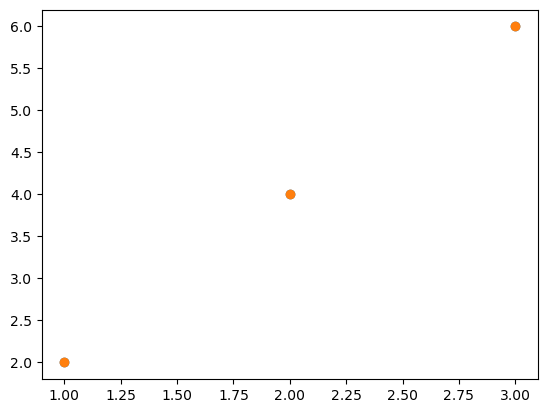

In [4]:
import matplotlib.pyplot as plt

plt.plot(x_train, y_train, 'o')
plt.show()

- 선형회귀에 필요한 라이브러리 셋팅

In [5]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [7]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


1. 가중치와 편향의 초기화

학습을 통해 변경될 값임을 선언 - "requires_grad= True"

In [7]:
W = torch.zeros(1, requires_grad=True) 
print(W) 

tensor([0.], requires_grad=True)


In [8]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


2. 가설 (선형관계식) 정의

In [9]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


3. 비용함수 선언하기

In [10]:
cost = torch.mean((hypothesis - y_train) ** 2) 
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


4. 경사하강법 구현하기 - torch.optim 라이브러리 사용

In [11]:
optimizer = optim.SGD([W, b], lr=0.01)


# 항상함께쓰는 3줄 셋트!
optimizer.zero_grad() 
# 비용 함수를 미분하여 gradient 계산
cost.backward() 
# W와 b를 업데이트
optimizer.step() 

- __optimizer.zero_grad()를 사용하는 이유__  
반복을 통해 가중치와 바이어스가 업데이트 될때 그래디언트가 누적되기 때문에 미분값을 0으로 초기화 해 줘야 함.

5. 반복학습

데이터를 정의하고, 가설을 초기화 하고, optimizer를 정의하는 건 한번만  
가설을 통해 예측을 하고, Cost를 계산하고, Optimizer를 이용해서 경사하강법으로 가중치를 업데이트하는건 반복

In [12]:
#데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1000 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1000 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1000 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1000 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1000 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1000 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1000 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1000 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1000 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1000 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1000 W: 1.971, b: 0.066 Cost: 0.000633


#### __다중 선형 회귀 풀어보기__  

1. 데이터 정의
2. 모델정의
3. Optimizer정의
4. hypothesis 계산
5. Cost 계산
6. Gradient descnet

![data loader](./data2.png)

In [13]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [14]:
# 가중치 w와 편향 b 초기화 - 입력변수가 3개 이므로 가중치도 3개
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [15]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/2000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/2000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563634
Epoch  200/2000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497603
Epoch  300/2000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435026
Epoch  400/2000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375730
Epoch  500/2000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319503
Epoch  600/2000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266215
Epoch  700/2000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215693
Epoch  800/2000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167821
Epoch  900/2000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122419
Epoch 1000/2000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079375
Epoch 1100/2000 w1: 0.722 w2: 0.608 w3: 0.680 b: 0.009 Cost: 1.038569
Epoch 1200/2000 w1: 0.727 w2: 0.603 w3: 0.681 b: 0.010 Cost: 0.999893
Epoch 1300/2000 w1: 0.731 w2: 0.599 w3: 0.681 b: 0.010 Cost: 0.963217
Epoch 1400/2000 

- 행렬 연산으로 바꿔서 파이토치 구현하기 - 입력 정보의 개수가 많은경우에 matmul로 한번에 계산하기 위해  

In [16]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

print(x_train.shape)
print(y_train.shape)

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

torch.Size([5, 3])
torch.Size([5, 1])
Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7861,  95.8280]) Cost: 3069.590820
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687500
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365657
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3

- 토치 라이브러리로 선형회귀 구현하기 (nn.Module)

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F  #loss function을 라이브러리에서 불러올 수 있도록

In [18]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)

print(list(model.parameters()))

[Parameter containing:
tensor([[-0.7542]], requires_grad=True), Parameter containing:
tensor([-0.2290], requires_grad=True)]


In [19]:
# SGD 생성자에 model.parameters()를 호출하면
# nn.Linear 모듈의 학습 가능한 매개변수들이 포함됩니다.

optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

nb_epochs = 2000

for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 37.974918
Epoch  100/2000 Cost: 0.060083
Epoch  200/2000 Cost: 0.037128
Epoch  300/2000 Cost: 0.022943
Epoch  400/2000 Cost: 0.014177
Epoch  500/2000 Cost: 0.008761
Epoch  600/2000 Cost: 0.005414
Epoch  700/2000 Cost: 0.003345
Epoch  800/2000 Cost: 0.002067
Epoch  900/2000 Cost: 0.001277
Epoch 1000/2000 Cost: 0.000789
Epoch 1100/2000 Cost: 0.000488
Epoch 1200/2000 Cost: 0.000301
Epoch 1300/2000 Cost: 0.000186
Epoch 1400/2000 Cost: 0.000115
Epoch 1500/2000 Cost: 0.000071
Epoch 1600/2000 Cost: 0.000044
Epoch 1700/2000 Cost: 0.000027
Epoch 1800/2000 Cost: 0.000017
Epoch 1900/2000 Cost: 0.000010
Epoch 2000/2000 Cost: 0.000006


- 예측해보기

In [20]:
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]]) 
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장

pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 


훈련 후 입력이 4일 때의 예측값 : tensor([[7.9949]], grad_fn=<AddmmBackward>)


In [21]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9971]], requires_grad=True), Parameter containing:
tensor([0.0067], requires_grad=True)]


In [22]:
print(torch.__version__)

1.4.0


### __다중 선형 회귀 구현하기__

In [23]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.3020,  0.4068, -0.0428]], requires_grad=True), Parameter containing:
tensor([0.0165], requires_grad=True)]


In [24]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [25]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 27897.162109
Epoch  100/2000 Cost: 8.912180
Epoch  200/2000 Cost: 8.459203
Epoch  300/2000 Cost: 8.030072
Epoch  400/2000 Cost: 7.623517
Epoch  500/2000 Cost: 7.238436
Epoch  600/2000 Cost: 6.873588
Epoch  700/2000 Cost: 6.527981
Epoch  800/2000 Cost: 6.200536
Epoch  900/2000 Cost: 5.890324
Epoch 1000/2000 Cost: 5.596471
Epoch 1100/2000 Cost: 5.318006
Epoch 1200/2000 Cost: 5.054259
Epoch 1300/2000 Cost: 4.804394
Epoch 1400/2000 Cost: 4.567622
Epoch 1500/2000 Cost: 4.343341
Epoch 1600/2000 Cost: 4.130832
Epoch 1700/2000 Cost: 3.929518
Epoch 1800/2000 Cost: 3.738780
Epoch 1900/2000 Cost: 3.558057
Epoch 2000/2000 Cost: 3.386846


In [26]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 

# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[153.6848]], grad_fn=<AddmmBackward>)


In [27]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5657, 0.7942, 0.6510]], requires_grad=True), Parameter containing:
tensor([0.0279], requires_grad=True)]


### __모델을 클래스로 구현하기__

1. 단순 선형회귀 구현하기

In [29]:
class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
    def __init__(self): #
        super().__init__()
        self.linear = nn.Linear(1, 1) # 단순 선형 회귀이므로 input_dim=1, output_dim=1.

    def forward(self, x):
        return self.linear(x)

In [30]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

model = LinearRegressionModel()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 18.729185
Epoch  100/2000 Cost: 0.176202
Epoch  200/2000 Cost: 0.108882
Epoch  300/2000 Cost: 0.067283
Epoch  400/2000 Cost: 0.041577
Epoch  500/2000 Cost: 0.025692
Epoch  600/2000 Cost: 0.015876
Epoch  700/2000 Cost: 0.009810
Epoch  800/2000 Cost: 0.006062
Epoch  900/2000 Cost: 0.003746
Epoch 1000/2000 Cost: 0.002315
Epoch 1100/2000 Cost: 0.001430
Epoch 1200/2000 Cost: 0.000884
Epoch 1300/2000 Cost: 0.000546
Epoch 1400/2000 Cost: 0.000338
Epoch 1500/2000 Cost: 0.000209
Epoch 1600/2000 Cost: 0.000129
Epoch 1700/2000 Cost: 0.000080
Epoch 1800/2000 Cost: 0.000049
Epoch 1900/2000 Cost: 0.000030
Epoch 2000/2000 Cost: 0.000019


2. 다중 선형회귀 클래스로 구현하기

In [31]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)

In [32]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

model = MultivariateLinearRegressionModel()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 5338.200195
Epoch  100/2000 Cost: 3.243483
Epoch  200/2000 Cost: 3.097303
Epoch  300/2000 Cost: 2.958745
Epoch  400/2000 Cost: 2.827426
Epoch  500/2000 Cost: 2.702963
Epoch  600/2000 Cost: 2.584976
Epoch  700/2000 Cost: 2.473135
Epoch  800/2000 Cost: 2.367105
Epoch  900/2000 Cost: 2.266615
Epoch 1000/2000 Cost: 2.171340
Epoch 1100/2000 Cost: 2.080991
Epoch 1200/2000 Cost: 1.995371
Epoch 1300/2000 Cost: 1.914169
Epoch 1400/2000 Cost: 1.837186
Epoch 1500/2000 Cost: 1.764188
Epoch 1600/2000 Cost: 1.694955
Epoch 1700/2000 Cost: 1.629292
Epoch 1800/2000 Cost: 1.567043
Epoch 1900/2000 Cost: 1.507997
Epoch 2000/2000 Cost: 1.451980


- 미니배치 이용하기: 대부분의 데이터는 적어도 수십만개 

엄청나게 많은 양의 데이터를 한번에 학습할 수 없다. - 너무 느리고, 하드웨어적으로도 불가능  
일부데이터로 학습하는 방법이 미니배치를 이용하는 것이다.

In [33]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [34]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [35]:
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [36]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 32915.390625
Epoch    0/20 Batch 2/3 Cost: 24823.759766
Epoch    0/20 Batch 3/3 Cost: 4877.746582
Epoch    1/20 Batch 1/3 Cost: 1147.888062
Epoch    1/20 Batch 2/3 Cost: 391.019348
Epoch    1/20 Batch 3/3 Cost: 137.026001
Epoch    2/20 Batch 1/3 Cost: 27.952017
Epoch    2/20 Batch 2/3 Cost: 23.567020
Epoch    2/20 Batch 3/3 Cost: 2.381600
Epoch    3/20 Batch 1/3 Cost: 2.465296
Epoch    3/20 Batch 2/3 Cost: 2.173973
Epoch    3/20 Batch 3/3 Cost: 8.966888
Epoch    4/20 Batch 1/3 Cost: 3.889177
Epoch    4/20 Batch 2/3 Cost: 0.306075
Epoch    4/20 Batch 3/3 Cost: 5.879900
Epoch    5/20 Batch 1/3 Cost: 0.075669
Epoch    5/20 Batch 2/3 Cost: 2.026061
Epoch    5/20 Batch 3/3 Cost: 11.111688
Epoch    6/20 Batch 1/3 Cost: 2.214596
Epoch    6/20 Batch 2/3 Cost: 5.513571
Epoch    6/20 Batch 3/3 Cost: 0.015797
Epoch    7/20 Batch 1/3 Cost: 5.501945
Epoch    7/20 Batch 2/3 Cost: 0.624093
Epoch    7/20 Batch 3/3 Cost: 0.300710
Epoch    8/20 Batch 1/3 Cost: 3.469089
Epoc

In [37]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.5352]], grad_fn=<AddmmBackward>)


### __사용자 데이터 활용하기__

- 사용자가 가지고 있는 데이터셋을 이용하는 방법    

![data loader](./dataloader.png)

- 선형회귀 구하기

In [38]:
from torch.utils.data import Dataset

In [39]:
# Dataset 상속
class CustomDataset(Dataset): 
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx): 
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [40]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
# shuffle=True는 epoch마다 데이터를 섞는 것을 말한다.

model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader): # enumerate는 인덱스와 데이터를 만드는 함수
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),  # len(dataloader): 한 에포크당 minibatch개수
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 54914.480469
Epoch    0/20 Batch 2/3 Cost: 13855.873047
Epoch    0/20 Batch 3/3 Cost: 6956.426758
Epoch    1/20 Batch 1/3 Cost: 1240.926147
Epoch    1/20 Batch 2/3 Cost: 641.935608
Epoch    1/20 Batch 3/3 Cost: 46.455490
Epoch    2/20 Batch 1/3 Cost: 91.712265
Epoch    2/20 Batch 2/3 Cost: 4.434297
Epoch    2/20 Batch 3/3 Cost: 1.488589
Epoch    3/20 Batch 1/3 Cost: 10.917598
Epoch    3/20 Batch 2/3 Cost: 5.173336
Epoch    3/20 Batch 3/3 Cost: 3.633673
Epoch    4/20 Batch 1/3 Cost: 7.710946
Epoch    4/20 Batch 2/3 Cost: 4.156493
Epoch    4/20 Batch 3/3 Cost: 2.055585
Epoch    5/20 Batch 1/3 Cost: 5.546842
Epoch    5/20 Batch 2/3 Cost: 5.594285
Epoch    5/20 Batch 3/3 Cost: 1.234643
Epoch    6/20 Batch 1/3 Cost: 6.970074
Epoch    6/20 Batch 2/3 Cost: 3.855728
Epoch    6/20 Batch 3/3 Cost: 1.339809
Epoch    7/20 Batch 1/3 Cost: 6.938311
Epoch    7/20 Batch 2/3 Cost: 3.459246
Epoch    7/20 Batch 3/3 Cost: 2.516360
Epoch    8/20 Batch 1/3 Cost: 5.393038
Epoch 

In [41]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[154.7225]], grad_fn=<AddmmBackward>)


## __로지스틱 회귀__

![data loader](./lo_regression.png)

![data loader](./reminder.png)

시험성적에 따른 합격, 불합격 데이터

![binary data](./binary.png)

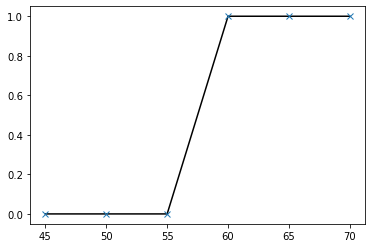

In [42]:
x=[45,50,55,60,65,70]
y=[0,0,0,1,1,1]

plt.plot(x,y,color='black')
plt.plot(x,y,'x')

- 시그모이드 함수

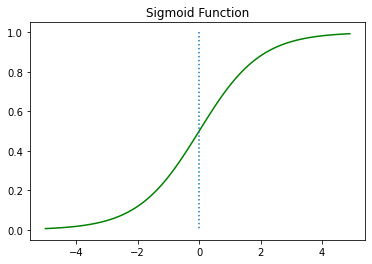

In [43]:
def sigmoid(x): # 시그모이드 함수 정의
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [44]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

torch.Size([6, 2])
torch.Size([6, 1])


- 계산 식으로 적어도 되지만, 토치 라이브러리를 이용해서 시그모이드 함수 구현 가능

In [45]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

- Binary Cross entropy loss

![cle_loss](./cat_cle_loss.png)

In [46]:
losses=-(y_train[0] * torch.log(hypothesis[0]) + 
  (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

cost=losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


- 계산식으로 적어도 되지만, 토치 라이브러리를 이용해서 크로스엔트로피 구현가능

In [49]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

In [50]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


- 크로스엔트로피 라이브러리 이용한 결과와 비교

In [51]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost =F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


- 학습이 잘 되었는지 확인

In [52]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


In [53]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


- 학습된 파라미터 값 확인

In [54]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


- 전체를 다 파이토치 라이브러리로 구현하기

In [55]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

model(x_train)

tensor([[0.1390],
        [0.0638],
        [0.0738],
        [0.0234],
        [0.0140],
        [0.0117]], grad_fn=<SigmoidBackward>)

In [56]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/100 Cost: 2.127849 Accuracy 50.00%
Epoch   10/100 Cost: 0.479633 Accuracy 66.67%
Epoch   20/100 Cost: 0.410227 Accuracy 83.33%
Epoch   30/100 Cost: 0.347159 Accuracy 83.33%
Epoch   40/100 Cost: 0.293602 Accuracy 83.33%
Epoch   50/100 Cost: 0.245430 Accuracy 100.00%
Epoch   60/100 Cost: 0.202335 Accuracy 100.00%
Epoch   70/100 Cost: 0.169252 Accuracy 100.00%
Epoch   80/100 Cost: 0.150666 Accuracy 100.00%
Epoch   90/100 Cost: 0.139571 Accuracy 100.00%
Epoch  100/100 Cost: 0.130387 Accuracy 100.00%


- 학습이 잘 되었는지 확인

In [57]:
model(x_train)

tensor([[0.0227],
        [0.1455],
        [0.2654],
        [0.8004],
        [0.9511],
        [0.9842]], grad_fn=<SigmoidBackward>)

In [58]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.5797, 0.4135]], requires_grad=True), Parameter containing:
tensor([-6.1706], requires_grad=True)]


- 모델을 클래스로 구현하기

In [59]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [60]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = BinaryClassifier()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/100 Cost: 2.757782 Accuracy 50.00%
Epoch   10/100 Cost: 0.943425 Accuracy 66.67%
Epoch   20/100 Cost: 0.588422 Accuracy 83.33%
Epoch   30/100 Cost: 0.482159 Accuracy 83.33%
Epoch   40/100 Cost: 0.396199 Accuracy 83.33%
Epoch   50/100 Cost: 0.314984 Accuracy 83.33%
Epoch   60/100 Cost: 0.241871 Accuracy 83.33%
Epoch   70/100 Cost: 0.186650 Accuracy 100.00%
Epoch   80/100 Cost: 0.157397 Accuracy 100.00%
Epoch   90/100 Cost: 0.143995 Accuracy 100.00%
Epoch  100/100 Cost: 0.134189 Accuracy 100.00%


### __소프트맥스 회귀__  

#### 클래스가 여러개일때 사용하는 방법

- 학습 데이터 준비하기

In [61]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [62]:
y_one_hot = torch.zeros(8, 3) #Class가 0,1,2로 3개
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [63]:
y_one_hot

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [64]:
y_train.unsqueeze(1)

tensor([[2],
        [2],
        [2],
        [1],
        [1],
        [1],
        [0],
        [0]])

In [65]:
y_one_hot

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

torch.scatter_와 torch.unsqueeze 함수를 활용하면 y를 one-hot encoding 할 수 있음.
scatter 함수의 의미는 순서대로 dimension=1 에 해당하는 방향으로 y_train.unsqueeze(1)의 값들을 흩뿌려주는데, 1 이라는 숫자를 사용하여 흩뿌리라는 의미이다.

![scatter](./scatter.png)

- 모델 구현하기

In [66]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) 

    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [67]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


- 모델 라이브러리 사용

In [68]:
model = nn.Linear(4, 3)

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.801172
Epoch  100/1000 Cost: 0.720446
Epoch  200/1000 Cost: 0.636338
Epoch  300/1000 Cost: 0.578350
Epoch  400/1000 Cost: 0.527740
Epoch  500/1000 Cost: 0.480111
Epoch  600/1000 Cost: 0.433820
Epoch  700/1000 Cost: 0.388085
Epoch  800/1000 Cost: 0.342558
Epoch  900/1000 Cost: 0.297544
Epoch 1000/1000 Cost: 0.256814


- 클래스로 구현하기

In [69]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3) # Output이 3!

    def forward(self, x):
        return self.linear(x)
    
model = SoftmaxClassifierModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.565856
Epoch  100/1000 Cost: 0.758088
Epoch  200/1000 Cost: 0.666714
Epoch  300/1000 Cost: 0.608195
Epoch  400/1000 Cost: 0.557963
Epoch  500/1000 Cost: 0.510913
Epoch  600/1000 Cost: 0.465259
Epoch  700/1000 Cost: 0.420179
Epoch  800/1000 Cost: 0.375231
Epoch  900/1000 Cost: 0.330270
Epoch 1000/1000 Cost: 0.285943
